# Problem Statement - 2

In [1]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
link='https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews'

In [3]:
## Getting reviews of first five pages
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Apple-iPad-10-2-inch-Wi-Fi-32GB/product-reviews/B07XVKRMRK?reviewerType=all_reviews&pageNumber=5


In [4]:
review_list

["Everything is fine and well built as we can expect from apple. Battery life is enough to last a whole day as my usual screen time is average 5 hours a day so there is always juice left in the device. As far as value for money I rate it 4 out of 5 star as it doesn't have laminated display whereas the display is quite nice and vivid. Only con is the soc that is a10 fusion which is few years old but in comparison to others it performs better than many tab in this price segment. Cannot say about gaming as I haven't tried it yet.",
 'I purchased a 32gb space grey 7th gen model. After using it for 2-3 days I noticed a battery problem. It took around 9-10 hours to completely charge the battery but the backup was good.. So I placed a replacement order and got a call from an amazon expert. He placed a replacement order for me and yesterday I got a new ipad and I returned the faulty one. Now in this ipad battery is Good. If you purchase this ipad  there is a very little chance that you may fac

In [5]:
len(review_list)

20

In [6]:
rv=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
rv

,Reviews
0,Everything is fine and well built as we can expect from apple. Battery life is enough to last a whole day as my usual screen time is average 5 hours a day so there is always juice left in the device. As far as value for money I rate it 4 out of 5 star as it doesn't have laminated display whereas the display is quite nice and vivid. Only con is the soc that is a10 fusion which is few years old but in comparison to others it performs better than many tab in this price segment. Cannot say about gaming as I haven't tried it yet.
1,I purchased a 32gb space grey 7th gen model. After using it for 2-3 days I noticed a battery problem. It took around 9-10 hours to completely charge the battery but the backup was good.. So I placed a replacement order and got a call from an amazon expert. He placed a replacement order for me and yesterday I got a new ipad and I returned the faulty one. Now in this ipad battery is Good. If you purchase this ipad there is a very little chance that you may face such inconvenience. Always take 2-3 days to check the product up to your marks and if there is some fault or anything just return or replace it.This was my experience but overall I knew that the new Ipad will be okay. Amazon customer service is quite good.
2,"Actually the ipad works well while suffering, batter life is also good, amoled screen is really helpful for students while learning for hours u hardly feel any stress.The only drawback which I faced is about charging case my charger is not working properly, actually it heated up very quickly which I found very risky, even i complained it to the amazon & even to apple but didn't get any solution. For this reason I m very unsatisfied with this product..While for functionality it is awesome."
3,Not sure about gaming(but whatever I played just got smooth experience. Battery life is excellent. If you want iPad for reading documents pdf books then the battery may last 12-15hours or even more. If you watch videos on YouTube or amazon Netflix then this iPad gives an average of 9-10 hours of battery backup. If you want to buy any tablet around 30k then just go for it don’t buy Samsung or Lenovo . Camera is excellent for scanning documents. And don’t worry about apps. App Store have soo many apps and iPad in itself have inbuilt productivity apps and essentials which work best with Apple ecosystem.
4,"I brought the IPad after my laptop broke down. I had thought that I’ll use this temporarily till I get a MacBook. Surprisingly, this has become my go to device for all my current needs.It costed be about 25k after the HDFC cashback and Ipad Mini 1 Exchange I put in an additional 2k for the bluetooth keyboard and mouse by Targus and now I have a full fledged laptop utility in under Rs. 30k.Highly recommend buying this set up instead of a 30-40k i3 windows laptop. This is far better, quicker and works like a breeze."
5,"Battery life - approx 15 hours if normally used ( browsing, youtube videos, notes making, reading and songs )Built quality awesome.Camera averageSound quality very goodProcessor 4 years old but working excellent no lagLight weightOverall very niceBut with same price I will suggest all to go for ipad 8th generation ( its much more powerful and excellent in its price range with A12 BIONIC)"
6,"We are using this device since January and it's working quite well. We use this as the second device after TV to watch any show or play games. It's been fun having this device. The money is worth just because of it's rich user experience. The way it feels when you do stuff in it is just pure pleasure. I have played games, drawn, edited videos, etc and it's better than working on the small screen of the mobile phone and more portable than a laptop."
7,"Easily it can replace laptop I bought this by selling my old laptop it will be useful,easy to carry anywhere you want the only thing that bothers me is the storage with 64GB storage we can use this device for storing photos and videos where as if yo

In [7]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\radhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
ps=PorterStemmer()

In [10]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [11]:
rv["Reviews"]=rv["Reviews"].apply(rvpreprocess)

In [12]:
rv.head()

,Reviews
0,everyth fine well built expect appl batteri life enough last whole day usual screen time averag hour day alway juic left devic far valu money rate star doesnt lamin display wherea display quit nice vivid con soc fusion year old comparison other perform better mani tab price segment cannot say game havent tri yet
1,purchas gb space grey th gen model use day notic batteri problem took around hour complet charg batteri backup good place replac order got call amazon expert place replac order yesterday got new ipad return faulti one ipad batteri good purchas ipad littl chanc may face inconveni alway take day check product mark fault anyth return replac itthi experi overal knew new ipad okay amazon custom servic quit good
2,actual ipad work well suffer batter life also good amol screen realli help student learn hour u hardli feel stressth drawback face charg case charger work properli actual heat quickli found riski even complain amazon even appl didnt get solut reason unsatisfi productwhil function awesom
3,sure gamingbut whatev play got smooth experi batteri life excel want ipad read document pdf book batteri may last hour even watch video youtub amazon netflix ipad give averag hour batteri backup want buy tablet around k go dont buy samsung lenovo camera excel scan document dont worri app app store soo mani app ipad inbuilt product app essenti work best appl ecosystem
4,brought ipad laptop broke thought ill use temporarili till get macbook surprisingli becom go devic current needsit cost k hdfc cashback ipad mini exchang put addit k bluetooth keyboard mous targu full fledg laptop util rs khighli recommend buy set instead k window laptop far better quicker work like breez


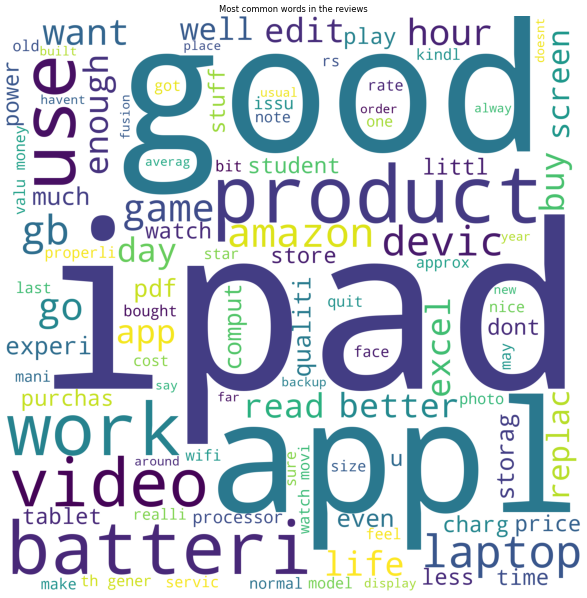

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(rv['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

# Sentiment Analysis

In [14]:
from textblob import TextBlob
rv['sentiment_score'] = rv['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
rv[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,everyth fine well built expect appl batteri life enough last whole day usual screen time averag hour day alway juic left devic far valu money rate star doesnt lamin display wherea display quit nice vivid con soc fusion year old comparison other perform better mani tab price segment cannot say game havent tri yet,0.097436
1,purchas gb space grey th gen model use day notic batteri problem took around hour complet charg batteri backup good place replac order got call amazon expert place replac order yesterday got new ipad return faulti one ipad batteri good purchas ipad littl chanc may face inconveni alway take day check product mark fault anyth return replac itthi experi overal knew new ipad okay amazon custom servic quit good,0.403247
2,actual ipad work well suffer batter life also good amol screen realli help student learn hour u hardli feel stressth drawback face charg case charger work properli actual heat quickli found riski even complain amazon even appl didnt get solut reason unsatisfi productwhil function awesom,0.233333
3,sure gamingbut whatev play got smooth experi batteri life excel want ipad read document pdf book batteri may last hour even watch video youtub amazon netflix ipad give averag hour batteri backup want buy tablet around k go dont buy samsung lenovo camera excel scan document dont worri app app store soo mani app ipad inbuilt product app essenti work best appl ecosystem,0.475000
4,brought ipad laptop broke thought ill use temporarili till get macbook surprisingli becom go devic current needsit cost k hdfc cashback ipad mini exchang put addit k bluetooth keyboard mous targu full fledg laptop util rs khighli recommend buy set instead k window laptop far better quicker work like breez,0.090000


In [15]:
## Defining function to assign sentiment category based on sentiment_score
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [16]:
rv['sentiment'] = rv['sentiment_score'].apply(lambda x:sentiment_category(x))

In [17]:
rv.head()

,Reviews,sentiment_score,sentiment
0,everyth fine well built expect appl batteri life enough last whole day usual screen time averag hour day alway juic left devic far valu money rate star doesnt lamin display wherea display quit nice vivid con soc fusion year old comparison other perform better mani tab price segment cannot say game havent tri yet,0.097436,Neutral
1,purchas gb space grey th gen model use day notic batteri problem took around hour complet charg batteri backup good place replac order got call amazon expert place replac order yesterday got new ipad return faulti one ipad batteri good purchas ipad littl chanc may face inconveni alway take day check product mark fault anyth return replac itthi experi overal knew new ipad okay amazon custom servic quit good,0.403247,Neutral
2,actual ipad work well suffer batter life also good amol screen realli help student learn hour u hardli feel stressth drawback face charg case charger work properli actual heat quickli found riski even complain amazon even appl didnt get solut reason unsatisfi productwhil function awesom,0.233333,Neutral
3,sure gamingbut whatev play got smooth experi batteri life excel want ipad read document pdf book batteri may last hour even watch video youtub amazon netflix ipad give averag hour batteri backup want buy tablet around k go dont buy samsung lenovo camera excel scan document dont worri app app store soo mani app ipad inbuilt product app essenti work best appl ecosystem,0.475000,Neutral
4,brought ipad laptop broke thought ill use temporarili till get macbook surprisingli becom go devic current needsit cost k hdfc cashback ipad mini exchang put addit k bluetooth keyboard mous targu full fledg laptop util rs khighli recommend buy set instead k window laptop far better quicker work like breez,0.090000,Neutral


In [18]:
## calculating the categories of sentiments and their counts
rv['sentiment'].value_counts()

Neutral     19
Positive     1
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

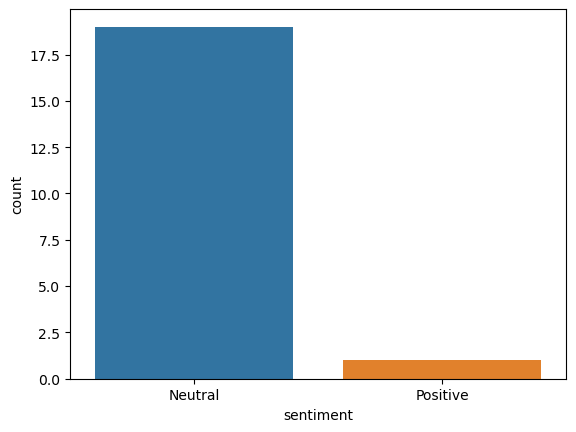

In [19]:
sns.countplot(x=rv['sentiment'])